In [124]:
from skimage.feature import peak_local_max
import pyclesperanto_prototype as cle
from skimage.io import imread, imshow
from skimage.filters import gaussian 
import matplotlib.pyplot as plt

In [139]:
image = imread(r"C:\Users\evgen\OneDrive\Desktop\BDS3_2025\data\input\2015.01.12_ETP_1h-1h_SII_Pos001_S001_0_C3.tif")#[-100:, 0:100]
image.shape

(99, 512, 512)

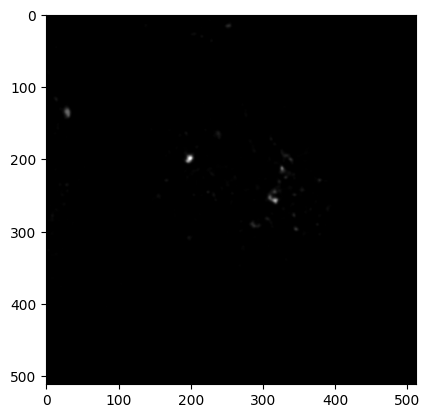

In [140]:
plt.imshow(image[56, :, :], cmap = "Grays_r")

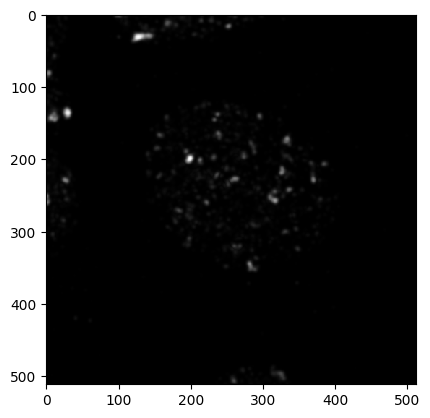

In [157]:
preprocessed = gaussian(image, sigma=1.5, preserve_range=True)
cle.imshow(preprocessed, continue_drawing=0.1)

In [158]:
print("min:", preprocessed.min())
print("max:", preprocessed.max())

min: 0.0
max: 94.02137915033313


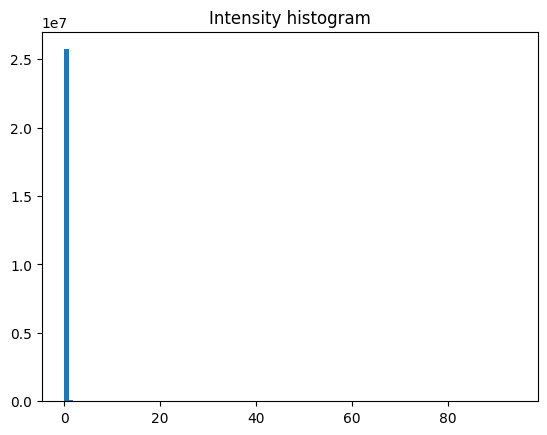

In [160]:
plt.hist(preprocessed.ravel(), bins=100)
plt.title("Intensity histogram")
plt.show()

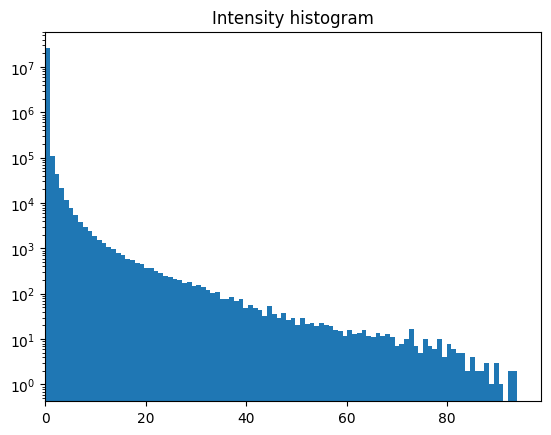

In [161]:
plt.hist(preprocessed.ravel(), bins=100)
plt.title("Intensity histogram")
#plt.xlim(right=5)
plt.xlim(left=0)
plt.yscale('log')  
plt.show()

In [163]:
from skimage.feature import peak_local_max
coordinates = peak_local_max(preprocessed, threshold_abs=4, footprint=np.ones((4, 4, 4)))
print(f"Max found: {len(coordinates)}")

Max found: 195


In [164]:
from ipywidgets import interact, IntSlider

@interact(z=IntSlider(min=0, max=preprocessed.shape[0]-1, step=1, value=45))
def show_z_slice(z):
    slice_coords = coordinates[coordinates[:, 0] == z]
    plt.figure(figsize=(6, 6))
    plt.imshow(preprocessed[z], cmap='gray')
    plt.plot(slice_coords[:, 2], slice_coords[:, 1], 'r.')
    plt.title(f"Z = {z}")
    plt.show()

interactive(children=(IntSlider(value=45, description='z', max=98), Output()), _dom_classes=('widget-interact'…